## Sub Plots in Python

- https://www.kaggle.com/code/asimislam/tutorial-python-subplots
- https://www.python-graph-gallery.com/194-split-the-graphic-window-with-subplot
- https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html
- https://pandas.pydata.org/docs/user_guide/visualization.html
- https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

## data set
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

### Python Code for Subplots
-----------------------------------------------------------
fig = plt.figure(figsize=(8,8))   #  figure size (optional)
plt.subplot(a,b,c)                #  subplot 1
plt.plot(data_1)                  #  data 1
plt.subplot(a,b,c)                #  subplot 2
plt.plot(data_2)                  #  data 2
plt.tight_layout()                #  no overlap (optional)
#### plt.show()                        #  draw subplot group
-----------------------------------------------------------
where:
    a  - number of rows
    b  - number of columns
    c  - plot counter
- Three Rules for Subplots:
    - row (a) and column (b) numbers are constant per subplot group
    - plot counter (c) is initialized (=1) and then incremented for each subplot
    - subplot(abc) and subplot(a,b,c) are the same commands

In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
for dirname, _, filenames in os.walk('../data/csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/csv\heart.csv
../data/csv\mtcarsOUT.csv
../data/csv\o2Saturation.csv


In [3]:
print(os.listdir('../data/csv'))

['heart.csv', 'mtcarsOUT.csv', 'o2Saturation.csv']


In [4]:
df = pd.read_csv('../data/csv/heart.csv')
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df['sex'] = df['sex'].map({0:'female', 1:'male'})
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


###  1 subplots 1x2
- Generate a 1x2 subplot.
    - 1, number of rows
    - 2, number of columns
    - subplot group: (1,2,c)

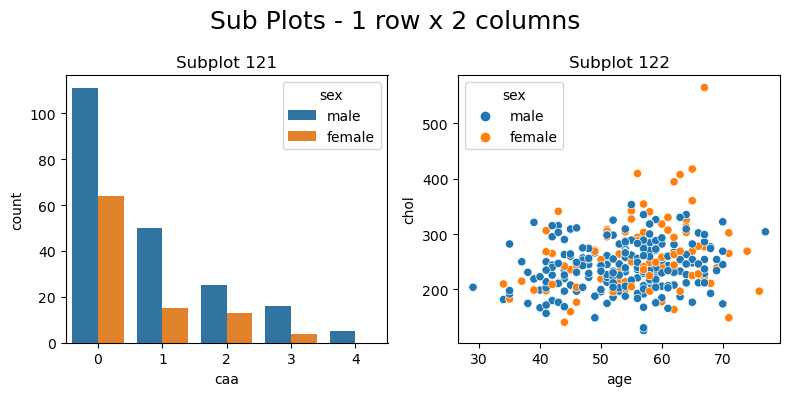

In [7]:
fig = plt.figure(figsize = (8,4))
plt.suptitle('Sub Plots - 1 row x 2 columns', fontsize = 18)
#subplot #1
plt.subplot(121) # it cannot be 123
plt.title('Subplot 121')
sns.countplot(data = df, x= 'caa', hue = 'sex')
#subplot #2
plt.subplot(122)
plt.title('Subplot 122')
sns.scatterplot(data = df, x='age', y='chol', hue='sex')

plt.tight_layout()
plt.show();

### 2 subplots 2x1
- Generate a 2x1 subplot.
    - 2, number of rows
    - 1, number of columns
    - subplot group: (2,1,c)

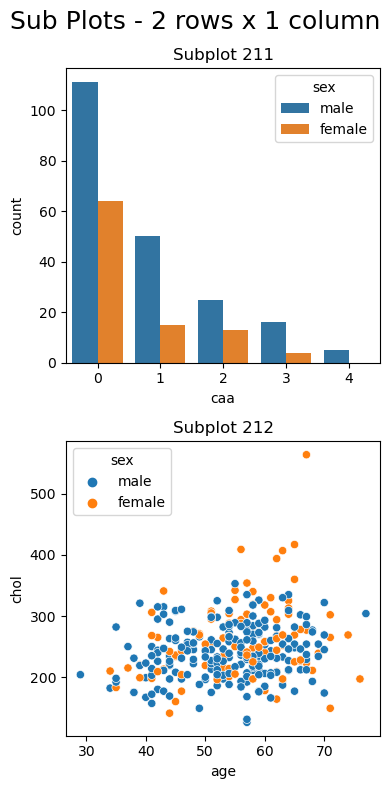

In [8]:
fig = plt.figure(figsize = (4,8))
plt.suptitle('Sub Plots - 2 rows x 1 column', fontsize = 18)
#subplot #1
plt.subplot(211) # it cannot be 213
plt.title('Subplot 211')
sns.countplot(data = df, x= 'caa', hue = 'sex')
#subplot #2
plt.subplot(212)
plt.title('Subplot 212')
sns.scatterplot(data = df, x='age', y='chol', hue='sex')

plt.tight_layout()
plt.show();

### 3 Subplots - 2 x 3
- Generate 5 plots inside 2x3 subplots.
    - 2, number of rows
    - 3, number of columns
    - subplot group: (2,3,c)

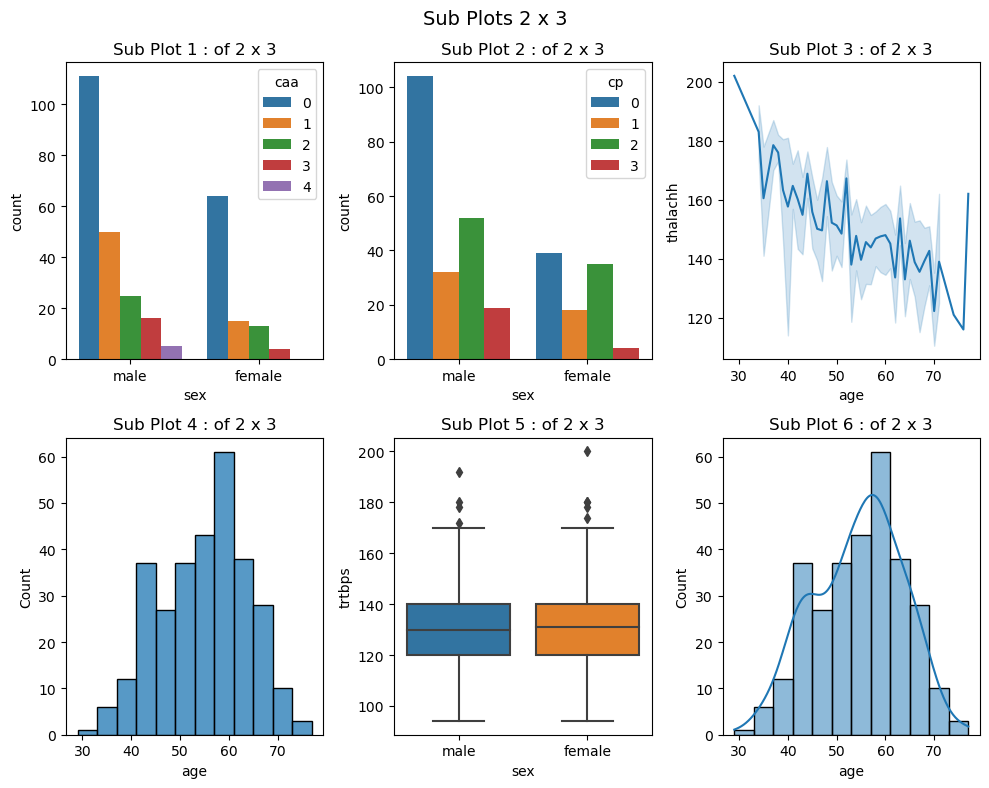

In [9]:
fig = plt.figure(figsize = (10,8))
fig.suptitle('Sub Plots 2 x 3', fontsize = 14)
#SL1
plt.subplot(231)
sns.countplot(data = df, x='sex', hue = 'caa')
plt.title('Sub Plot 1 : of 2 x 3')

#SL2
plt.subplot(2,3,2)
sns.countplot(data = df, x='sex', hue = 'cp')
plt.title('Sub Plot 2 : of 2 x 3')

#SL3
plt.subplot(2,3,3)
sns.lineplot(data = df, x='age', y = 'thalachh')
plt.title('Sub Plot 3 : of 2 x 3')

#SL4
plt.subplot(2,3,4)
sns.histplot(data = df, x='age', kde=False)
plt.title('Sub Plot 4 : of 2 x 3')

#SL5
plt.subplot(2,3,5)
sns.boxplot(data = df, x='sex', y= 'trtbps')
plt.title('Sub Plot 5 : of 2 x 3')

#SL6
plt.subplot(2,3,6)
sns.histplot(data = df, x='age', kde=True)
plt.title('Sub Plot 6 : of 2 x 3')

plt.tight_layout()
plt.show();

### 4. Subplots with FOR Loop
- Categorical data will be plotted. Each attribute (column name) will have one plot.
    - a = 2, number of rows
    - b = 3, number of columns
    - c = 1, initialize plot counter
    - subplot group: (2,3,c)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

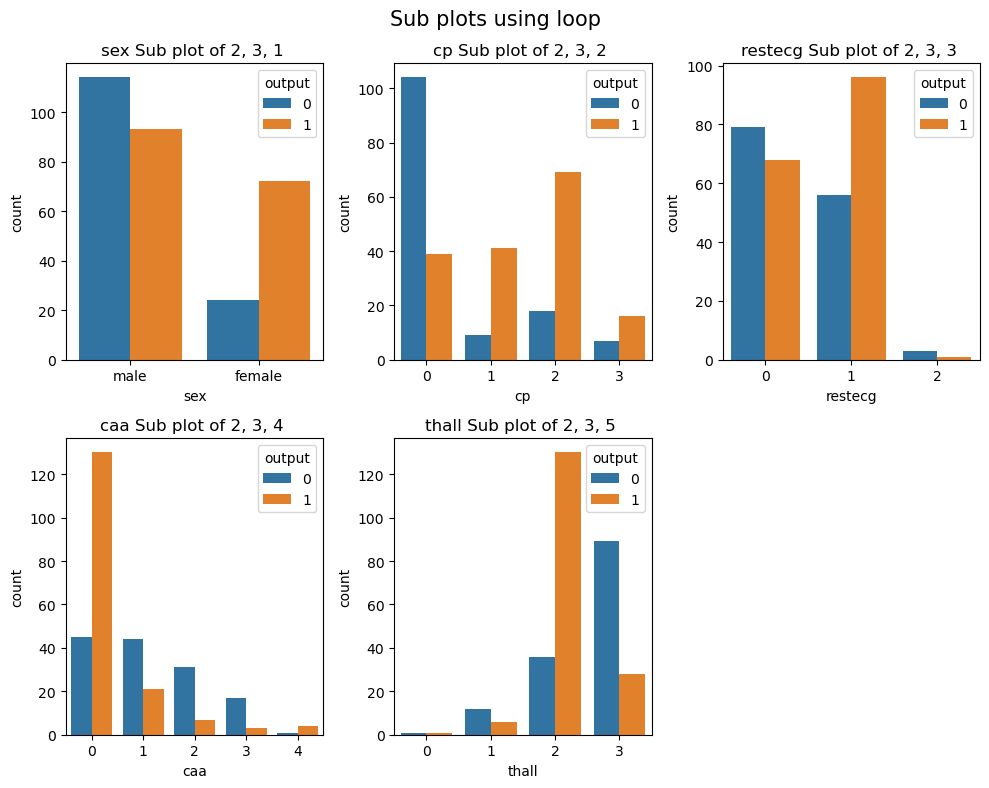

In [11]:
heart_CAT = ['sex', 'cp', 'restecg', 'caa', 'thall']
#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (10,8))
plt.suptitle('Sub plots using loop', fontsize = 15)

for i in heart_CAT:
    plt.subplot(a,b,c)
    plt.title('{} Sub plot of {}, {}, {} '.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data=df, x=i, hue='output')
    c = c + 1
    
plt.tight_layout()
plt.show();

In [12]:
df.dtypes

age           int64
sex          object
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

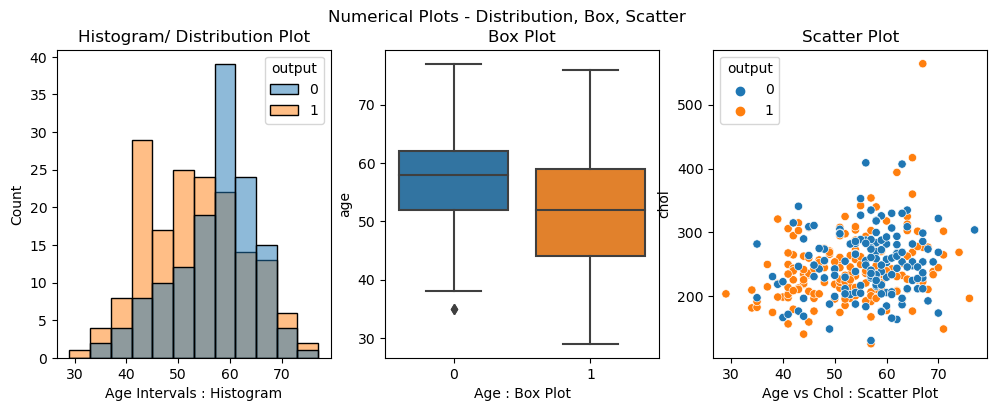

In [81]:
# numerical plots
plt.figure(figsize=(12,4))
plt.suptitle('Numerical Plots - Distribution, Box, Scatter')

plt.subplot(1,3,1)
sns.histplot(data=df, x='age', hue='output')
plt.title('Histogram/ Distribution Plot')
plt.xlabel('Age Intervals : Histogram')

plt.subplot(1,3,2)
sns.boxplot(data=df, y='age', x='output')
plt.title('Box Plot')
plt.xlabel('Age : Box Plot')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='age', y = 'chol', hue='output')
plt.title('Scatter Plot')
plt.xlabel('Age vs Chol : Scatter Plot')

#plt.tight_layout()
plt.show();

In [13]:
## numerical data using loop
df.dtypes

age           int64
sex          object
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [15]:
heart_NUM =['age', 'trtbps', 'chol', 'oldpeak']
df[heart_NUM].head()

,age,trtbps,chol,oldpeak
0,63,145,233,2.3
1,37,130,250,3.5
2,41,130,204,1.4
3,56,120,236,0.8
4,57,120,354,0.6


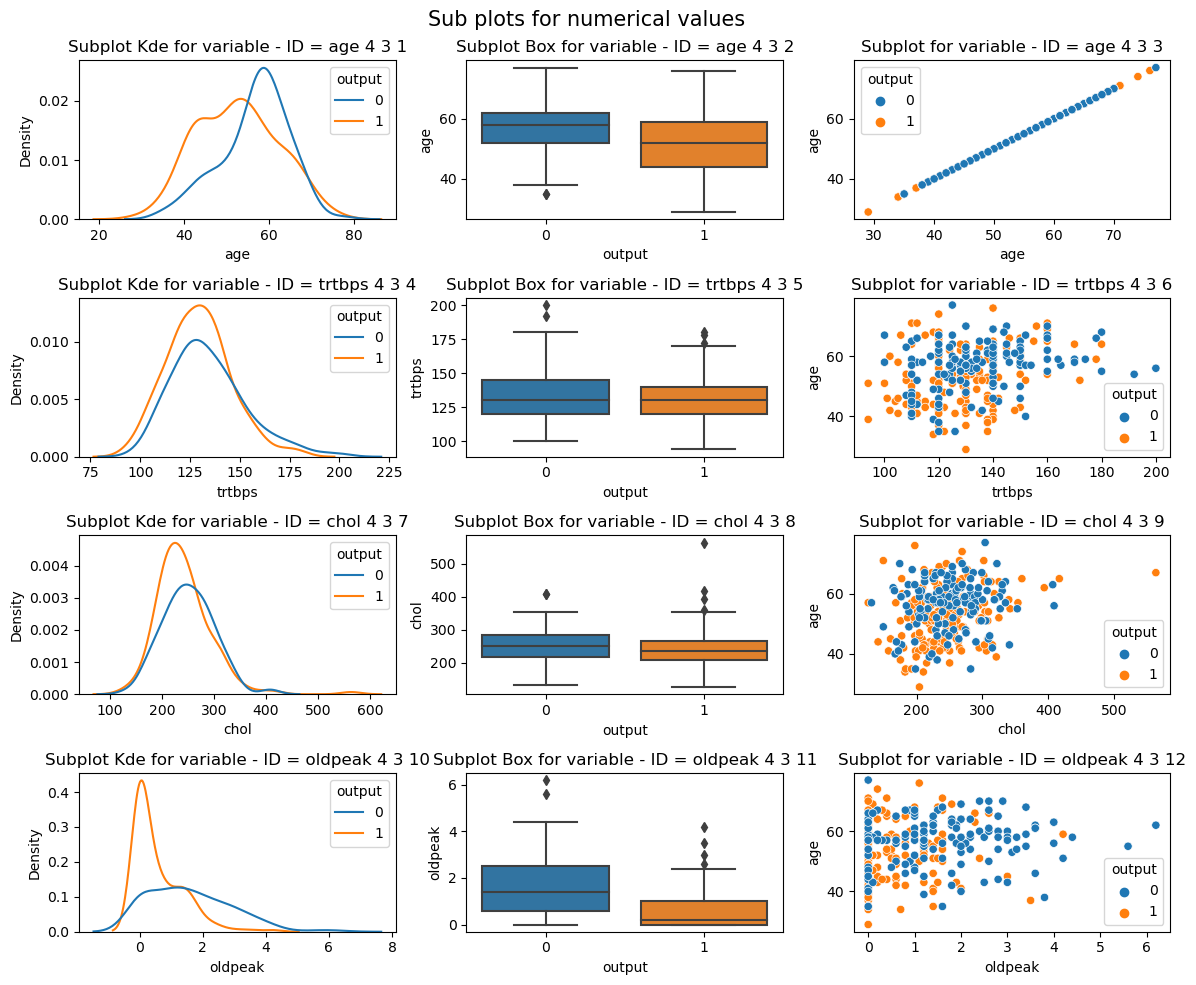

In [27]:
a = len(heart_NUM)
b = 3  #types
c = 1 #inital plot counter value

fig = plt.figure(figsize = (12,10))
plt.suptitle('Sub plots for numerical values', fontsize = 15)

for i in heart_NUM:
#kde plot
    plt.subplot(a, b, c)
    plt.title('Subplot Kde for variable - ID = {} {} {} {}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.kdeplot(data = df, hue = 'output', x=i)
    c = c + 1
#box plot
    plt.subplot(a, b, c)
    plt.title('Subplot Box for variable - ID = {} {} {} {}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = df, x= 'output', y=i)
    c = c + 1
#scatter plot
    plt.subplot(a, b, c)
    plt.title('Subplot for variable - ID = {} {} {} {}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = df, x=i, y ='age', hue='output')
    c = c + 1   
    
    
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Age vs Chol : Scatter Plot')

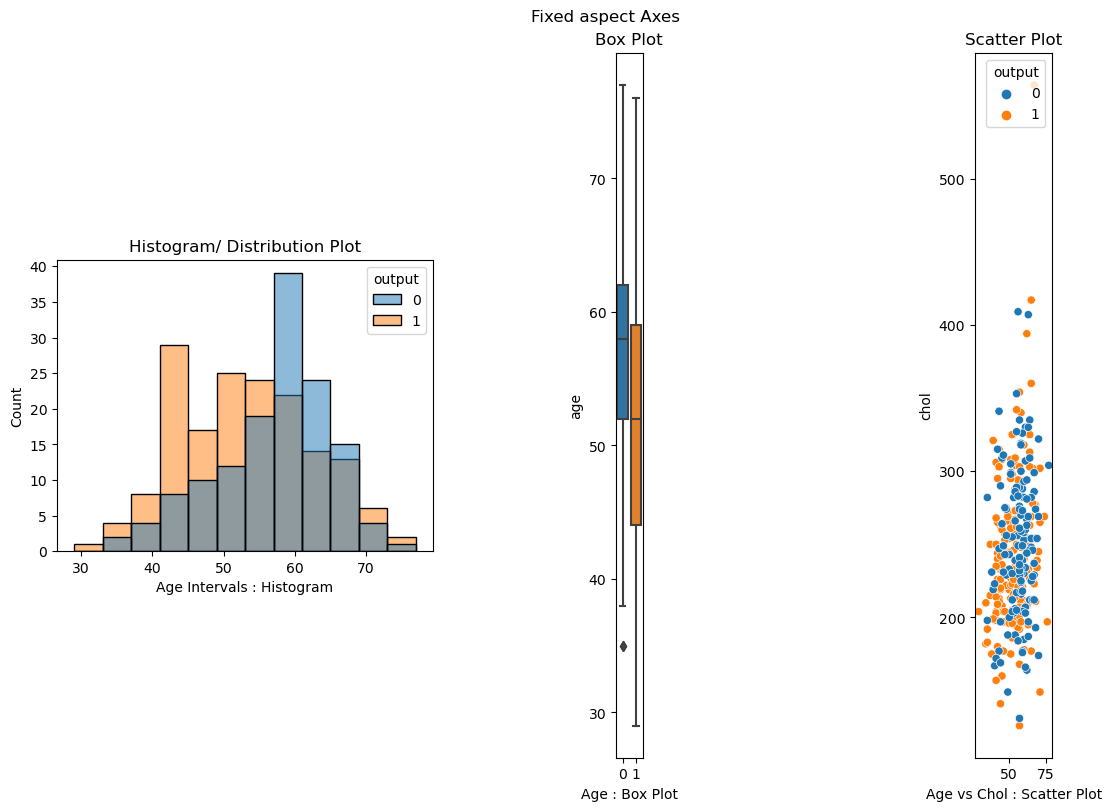

In [90]:
fig, axs = plt.subplots(1, 3, layout='constrained', figsize=(12,8))
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes')

plt.subplot(1,3,1)
sns.histplot(data=df, x='age', hue='output')
plt.title('Histogram/ Distribution Plot')
plt.xlabel('Age Intervals : Histogram')

plt.subplot(1,3,2)
sns.boxplot(data=df, y='age', x='output')
plt.title('Box Plot')
plt.xlabel('Age : Box Plot')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='age', y = 'chol', hue='output')
plt.title('Scatter Plot')
plt.xlabel('Age vs Chol : Scatter Plot')

### 6.Heatmaps with Subplots
- Correlation heatmaps for both the sexes are plottled side-by-side (1x2 subplot).
    - 1, number of rows
    - 2, number of columns
    - subplot group: (1,2,c)

In [29]:
heart_CORR =['sex', 'age', 'chol', 'trtbps']
#df[heart_CORR].head()
df_corr = df[heart_CORR]
df_corr.head()

,sex,age,chol,trtbps
0,male,63,233,145
1,male,37,250,130
2,female,41,204,130
3,male,56,236,120
4,female,57,354,120


In [37]:
dfFemale = df_corr[df_corr['sex'] == 'female']   #filter only females
dfFemaleCorr = dfFemale.drop(['sex'], axis=1).corr()   #drop sex column and then find correlation matrix
dfMale = df_corr[df_corr['sex'] == 'male']   #filter only males
dfMaleCorr = dfMale.drop(['sex'], axis=1).corr()   #drop sex column and then find correlation matrix
print(dfFemaleCorr)
print(dfMaleCorr)

             age      chol    trtbps
age     1.000000  0.260548  0.313959
chol    0.260548  1.000000  0.152388
trtbps  0.313959  0.152388  1.000000
             age      chol    trtbps
age     1.000000  0.158983  0.254196
chol    0.158983  1.000000  0.085369
trtbps  0.254196  0.085369  1.000000


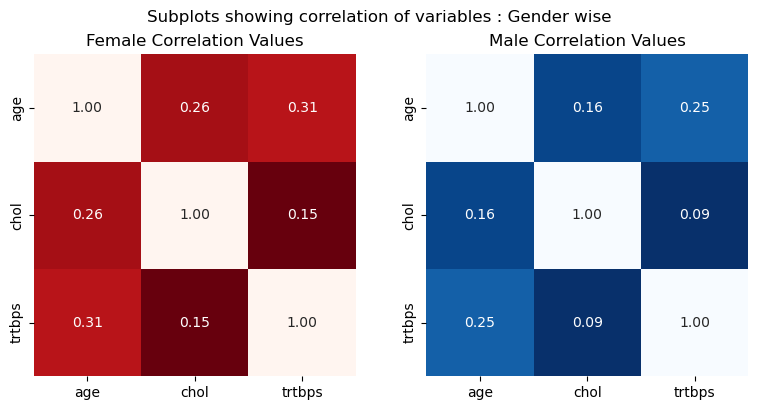

In [46]:
fig = plt.figure(figsize = (8,4))
plt.suptitle('Subplots showing correlation of variables : Gender wise')

plt.subplot(1,2,1)
plt.title('Female Correlation Values')
sns.heatmap(dfFemaleCorr, annot=True, cbar = False, fmt = '.2f', square = True, cmap='Reds_r')

plt.subplot(1,2,2)
plt.title('Male Correlation Values')
sns.heatmap(dfMaleCorr, annot=True, cbar = False, fmt = '.2f', square = True, cmap='Blues_r')

plt.tight_layout()
plt.show();

### 7. Seaborn pairplot()
Seaborn pairplot() creates a bivariate scatter plot for each attribute in a dataframe and automatically creates the subplots. The diagonal axes are univariate distribution of the data for the variable in that column.

In [52]:
heart_NUM =['age', 'trtbps', 'chol', 'oldpeak']
df[heart_NUM].head()

,age,trtbps,chol,oldpeak
0,63,145,233,2.3
1,37,130,250,3.5
2,41,130,204,1.4
3,56,120,236,0.8
4,57,120,354,0.6


<Figure size 800x600 with 0 Axes>

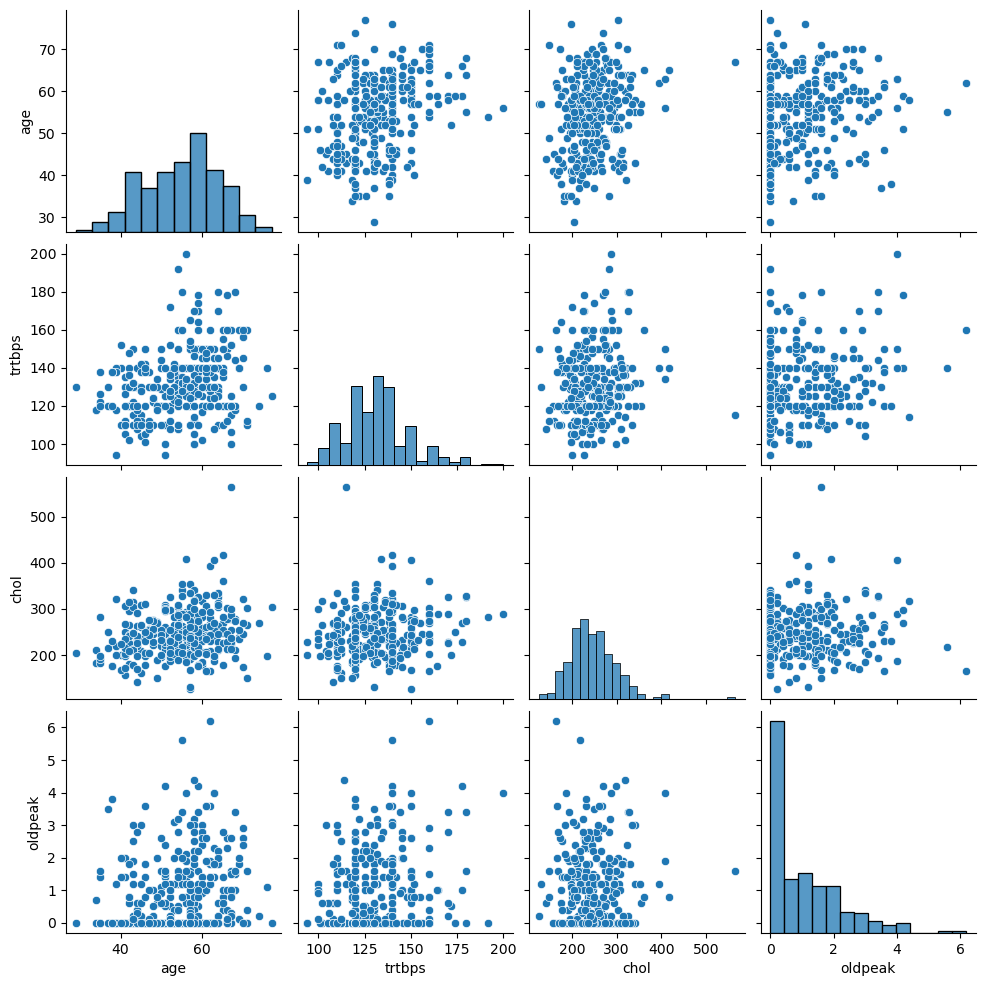

In [58]:
fig = plt.figure(figsize = (8,6))
sns.pairplot(data = df[heart_NUM])
plt.show()